In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import Accuracy, Precision, Recall, AUC
from keras.regularizers import l2
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-05-11 00:08:52.742337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 00:08:52.742437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 00:08:52.856487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/liver-disease-patient-dataset/test.csv.xlsx
/kaggle/input/liver-disease-patient-dataset/Liver Patient Dataset (LPD)_train.csv
/kaggle/input/lpd-train/Liver_Patient_Dataset_LPD_train.csv
/kaggle/input/lpd-gru/Liver_Patient_Dataset_LPD_train.csv
/kaggle/input/liver-patient-dataset-lpd-train/Liver_Patient_Dataset_LPD_train.editedcsv.csv


In [2]:
df = pd.read_csv("/kaggle/input/lpd-gru/Liver_Patient_Dataset_LPD_train.csv", encoding="latin1")
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [3]:
df.shape

(30691, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [5]:
# Checking the entire data frame for missing values
df.isnull().sum().max()

902

In [6]:
df.dropna(inplace=True)

<Axes: >

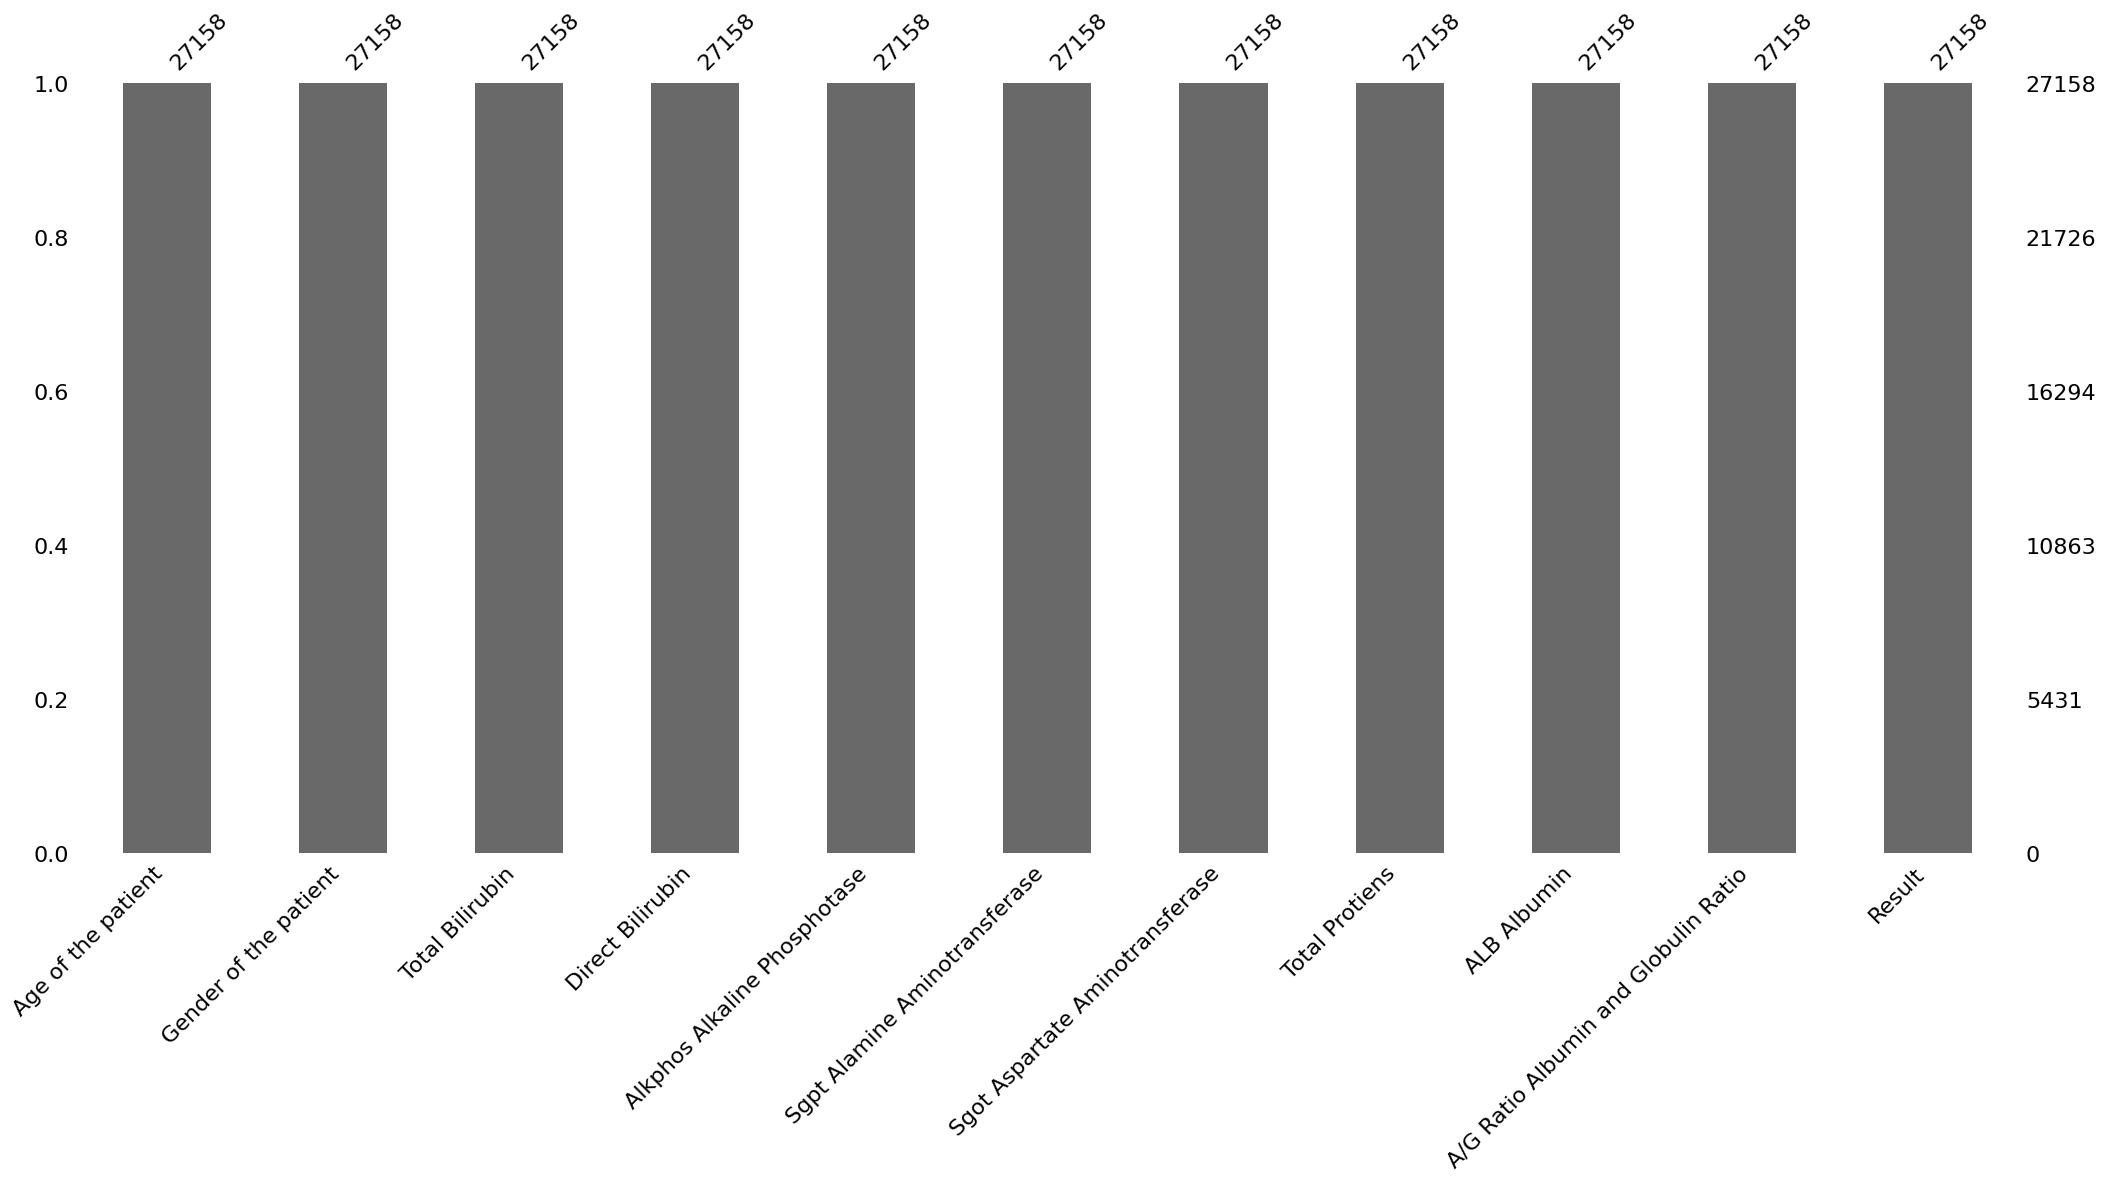

In [7]:
import missingno

missingno.bar(df)

In [8]:
df.columns = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result']

In [9]:
df["Age of the patient"] = df["Age of the patient"].fillna(df["Age of the patient"].mode()[0])
df["Gender of the patient"] = df["Gender of the patient"].fillna(df["Gender of the patient"].mode()[0])
df["Total Bilirubin"] = df["Total Bilirubin"].fillna(df["Total Bilirubin"].mean())
df["Direct Bilirubin"] = df["Direct Bilirubin"].fillna(df["Direct Bilirubin"].mean())
df["Alkphos Alkaline Phosphotase"] = df["Alkphos Alkaline Phosphotase"].fillna(df["Alkphos Alkaline Phosphotase"].mean())
df["Sgpt Alamine Aminotransferase"] = df["Sgpt Alamine Aminotransferase"].fillna(df["Sgpt Alamine Aminotransferase"].mean())
df["Sgot Aspartate Aminotransferase"] = df["Sgot Aspartate Aminotransferase"].fillna(df["Sgot Aspartate Aminotransferase"].mean())
df["Total Protiens"] = df["Total Protiens"].fillna(df["Total Protiens"].mean())
df["ALB Albumin"] = df["ALB Albumin"].fillna(df["ALB Albumin"].mean())
df["A/G Ratio Albumin and Globulin Ratio"] = df["A/G Ratio Albumin and Globulin Ratio"].fillna(df["A/G Ratio Albumin and Globulin Ratio"].mean())

In [10]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

<Axes: ylabel='count'>

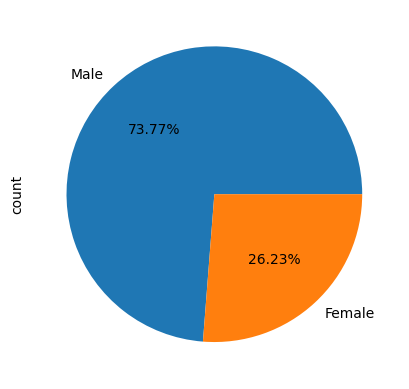

In [11]:
df["Gender of the patient"].value_counts().plot(kind="pie", autopct="%.2f%%")

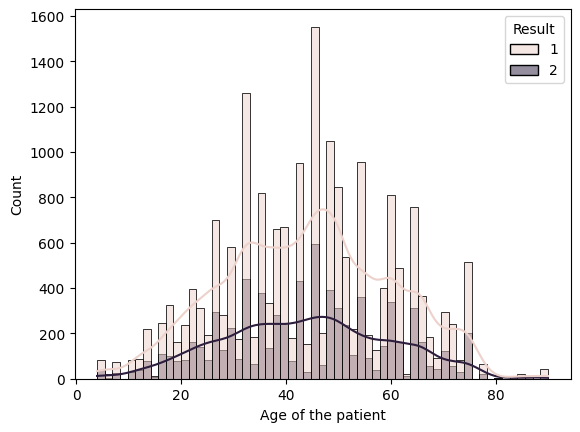

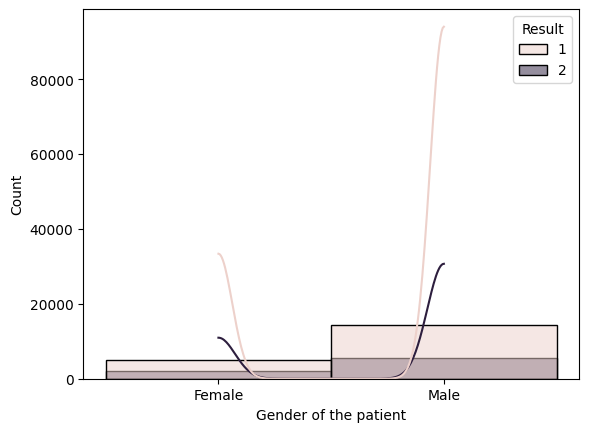

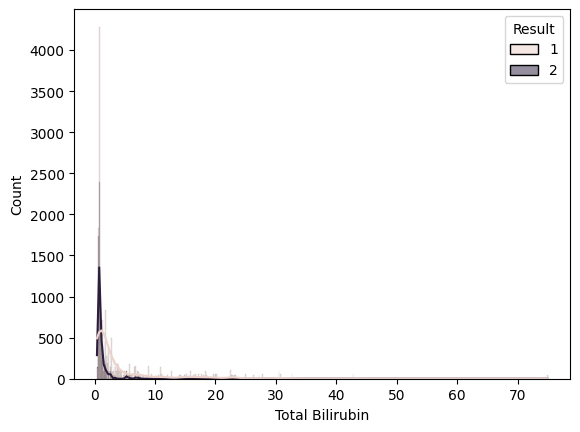

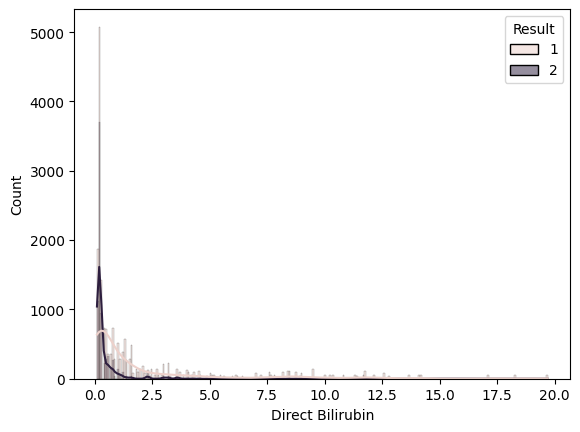

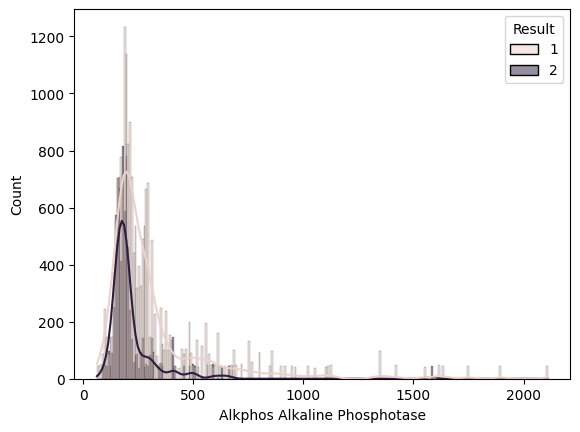

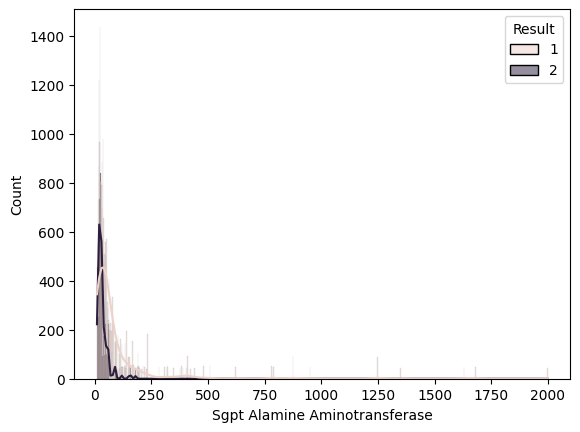

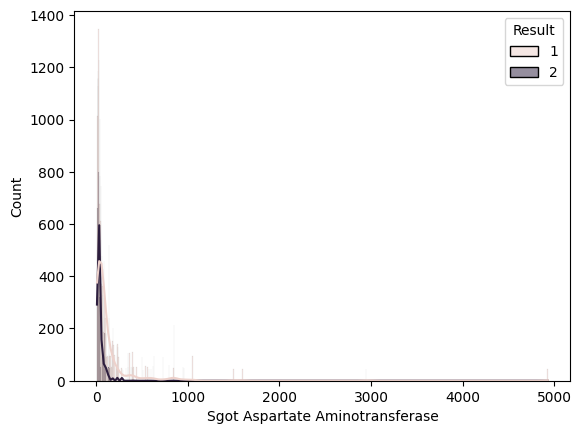

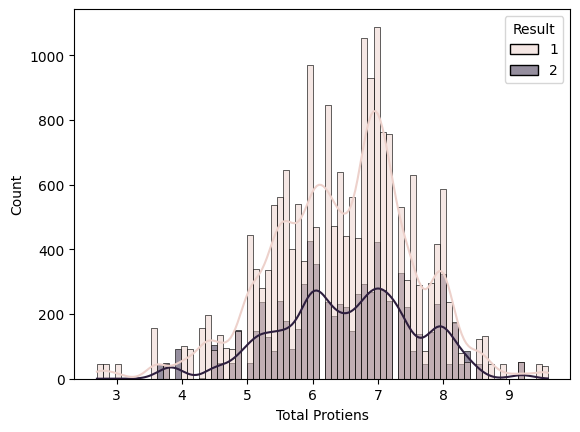

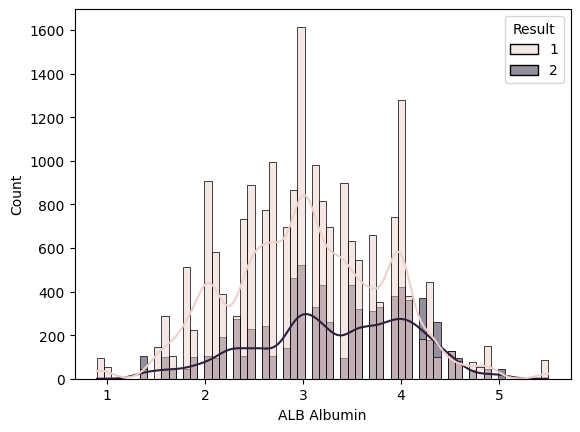

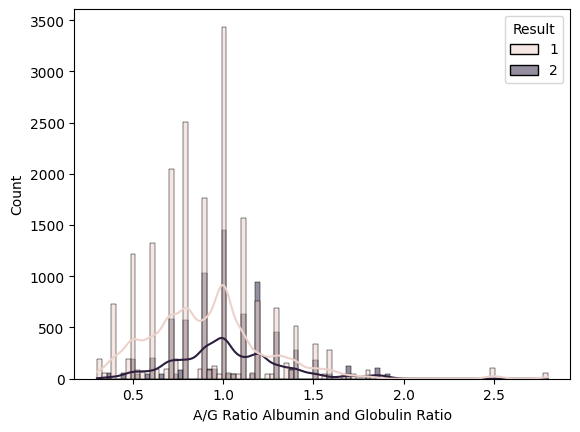

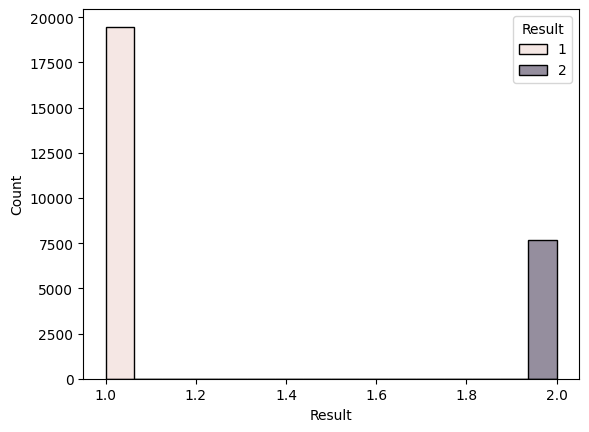

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure()
    sns.histplot(data=df, x=col, hue="Result", kde=True)
    plt.show()

In [13]:
df["Result"] = df["Result"].map({
    1: 0, 2: 1
})

In [14]:
df["Gender of the patient"] = df["Gender of the patient"].map({
    "Male": 1, "Female": 0
})

In [15]:
X = df.drop("Result", axis=1)
y = df["Result"]

In [16]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sequence_length = 5  # Choose an appropriate sequence length
X_train_sequence = [X_train[i:i+sequence_length] for i in range(len(X_train) - sequence_length + 1)]
X_test_sequence = [X_test[i:i+sequence_length] for i in range(len(X_test) - sequence_length + 1)]
y_train_sequence = y_train[sequence_length - 1:]
y_test_sequence = y_test[sequence_length - 1:]

In [18]:
X_train_sequence = np.array(X_train_sequence)
X_test_sequence = np.array(X_test_sequence)

In [19]:
learning_rate = 0.001
window_size = sequence_length  # Adjusted window size
k_reg = 0.001
dropout_rate = 0.2
layer_1 = 64
epochs = 80
batch_size = 128

# Define the custom optimizer
custom_optimizer = Adam(learning_rate=learning_rate)

In [20]:
# Assuming you have defined your training data X_train
window_size = X_train_sequence.shape[1]  # Assuming window size equals the number of features

In [21]:
from keras.losses import BinaryCrossentropy

# Define the GRU model with more layers
model = Sequential()
model.add(GRU(units=layer_1, input_shape=(window_size, X_train.shape[1]), kernel_regularizer=l2(k_reg), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(GRU(units=layer_1, kernel_regularizer=l2(k_reg), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(GRU(units=layer_1, kernel_regularizer=l2(k_reg), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(GRU(units=layer_1, kernel_regularizer=l2(k_reg)))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

In [22]:
from keras.metrics import Accuracy, Precision, Recall, AUC

model.compile(optimizer=custom_optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 5, 64)          │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 5, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,561 (353.75 KB)

 Trainable params: 90,049 (351.75 KB)

 Non-trainable params: 512 (2.00 KB)

In [23]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_sequence, y_train_sequence, epochs=epochs, validation_data=(X_test_sequence, y_test_sequence), batch_size=batch_size, callbacks=[early_stopping], verbose=1)

Epoch 1/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5910 - loss: 0.9939 - val_accuracy: 0.7179 - val_loss: 0.7686
Epoch 2/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6835 - loss: 0.7661 - val_accuracy: 0.7163 - val_loss: 0.6609
Epoch 3/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6946 - loss: 0.6779 - val_accuracy: 0.7104 - val_loss: 0.6174
Epoch 4/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6993 - loss: 0.6259 - val_accuracy: 0.7108 - val_loss: 0.5930
Epoch 5/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6998 - loss: 0.6042 - val_accuracy: 0.7130 - val_loss: 0.5795
Epoch 6/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7024 - loss: 0.5812 - val_accuracy: 0.7093 - val_loss: 0.5616
Epoch 7/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7054 - loss: 0.5612 - val_accuracy: 0.7124 - val_loss: 0.5513
Epoch 8/80
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7097 - loss: 0.5505 - val_acc

In [24]:
loss, accuracy = model.evaluate(X_test_sequence, y_test_sequence)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8604 - loss: 0.3234
Test Loss: 0.32563865184783936
Test Accuracy: 0.8546425700187683


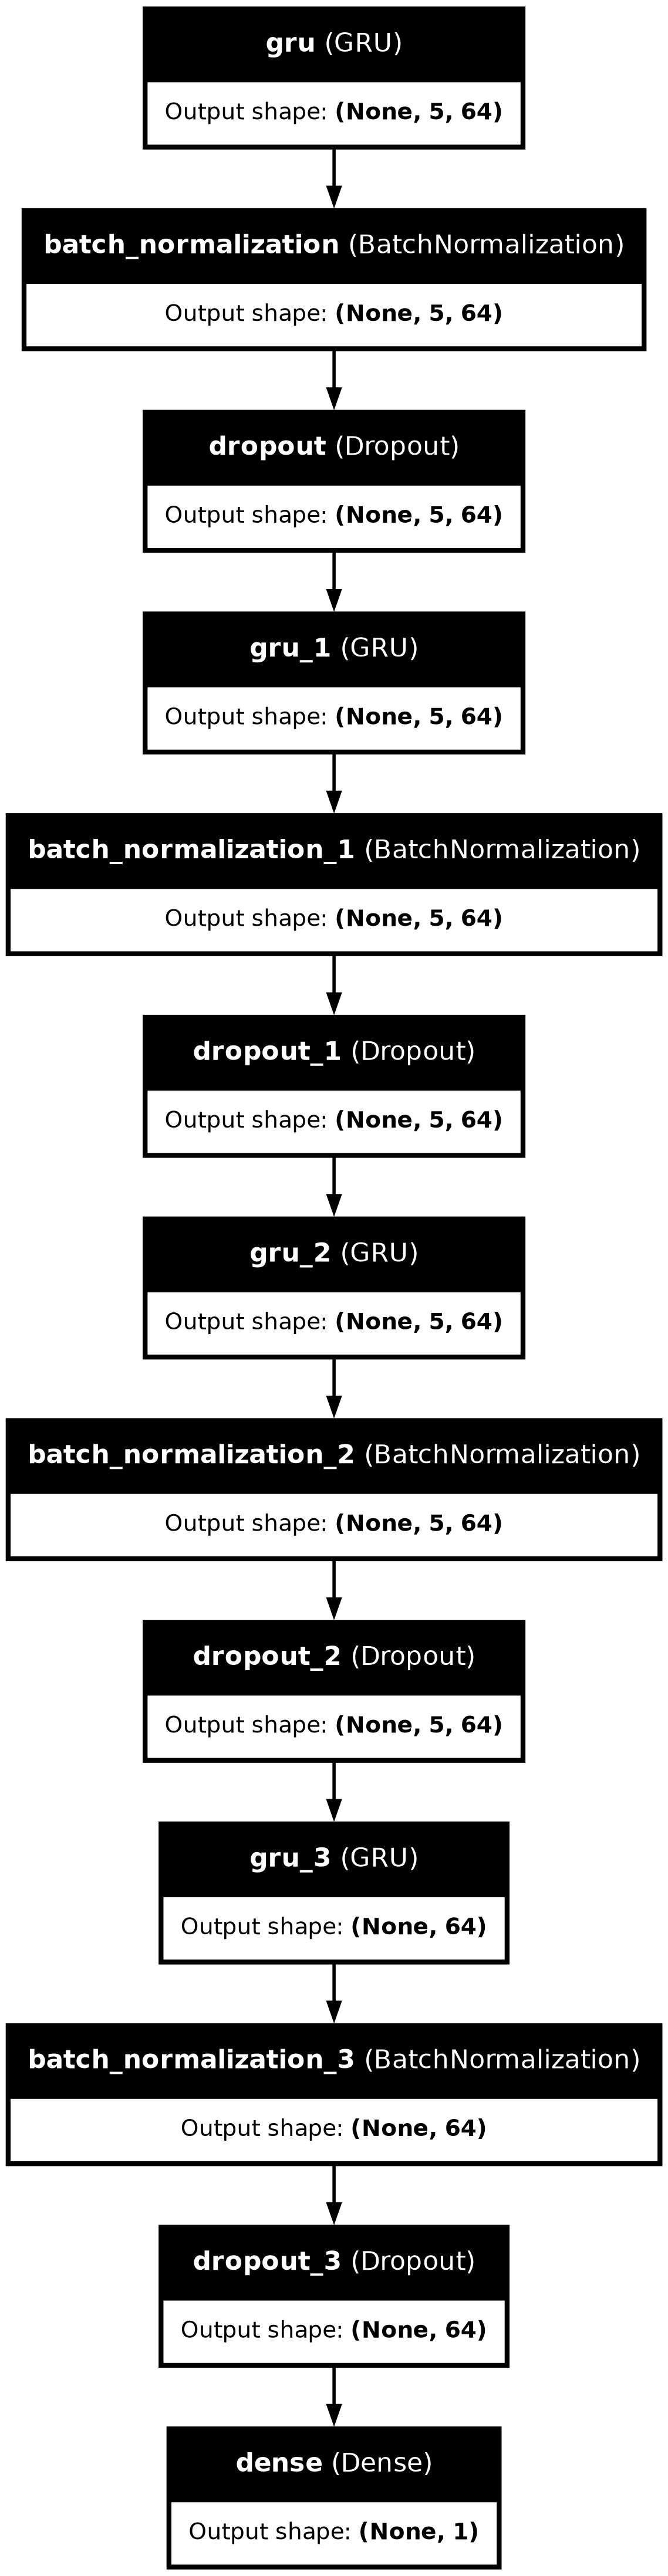

In [25]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

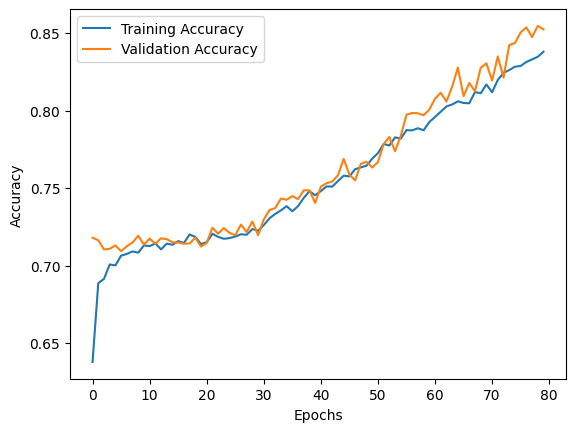

In [26]:
# Plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()